<a href="https://colab.research.google.com/github/lyj12h/ai_m/blob/main/practice/1011_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터를 넣고 data 폴더에 넣어줌

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/dirty_data.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/fb_2018.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/fb_week_of_may_20_per_minute.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/melted_stock_data.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/nyc_weather_2018.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/stocks.db

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/weather.db

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/weather_by_station.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/weather_stations.csv

!mkdir data

!mv *.* data

--2023-10-12 09:09:40--  https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/dirty_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46422 (45K) [text/plain]
Saving to: ‘dirty_data.csv’

dirty_data.csv      100%[===================>]  45.33K  --.-KB/s    in 0.02s   

2023-10-12 09:09:40 (2.69 MB/s) - ‘dirty_data.csv’ saved [46422/46422]

--2023-10-12 09:09:40--  https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/fb_2018.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conn

In [2]:
import pandas as pd

weather = pd.read_csv('data/nyc_weather_2018.csv')
weather.head()

,date,datatype,station,attributes,value
0,2018-01-01T00:00:00,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0017,",,N,",0.0


Find all entries where datatype is “PRCP“ and station ID containing “S0007”

In [3]:
#solution1
snow_data = weather.query('datatype == "PRCP" and station.str.contains("S007")')
snow_data.head()

,date,datatype,station,attributes,value
10245,2018-02-15T00:00:00,PRCP,GHCND:US1NJMS0078,",,N,",1.0
10457,2018-02-16T00:00:00,PRCP,GHCND:US1NJMS0078,",,N,",3.3
11601,2018-02-21T00:00:00,PRCP,GHCND:US1NJMS0078,",,N,",0.0
11809,2018-02-22T00:00:00,PRCP,GHCND:US1NJMS0078,",,N,",7.9
12014,2018-02-23T00:00:00,PRCP,GHCND:US1NJMS0078,",,N,",8.1


In [62]:
#solution2
weather[
(weather.datatype == 'PRCP') & weather.station.str.contains('S007' )]

,date,datatype,station,attributes,value
10245,2018-02-15T00:00:00,PRCP,GHCND:US1NJMS0078,",,N,",1.0
10457,2018-02-16T00:00:00,PRCP,GHCND:US1NJMS0078,",,N,",3.3
11601,2018-02-21T00:00:00,PRCP,GHCND:US1NJMS0078,",,N,",0.0
11809,2018-02-22T00:00:00,PRCP,GHCND:US1NJMS0078,",,N,",7.9
12014,2018-02-23T00:00:00,PRCP,GHCND:US1NJMS0078,",,N,",8.1
...,...,...,...,...,...
65188,2018-10-31T00:00:00,PRCP,GHCND:US1NJMS0070,",,N,",0.0
65411,2018-11-01T00:00:00,PRCP,GHCND:US1NJMS0070,",,N,",0.0
65625,2018-11-02T00:00:00,PRCP,GHCND:US1NJMS0070,",,N,",0.5
65826,2018-11-03T00:00:00,PRCP,GHCND:US1NJMS0070,",,N,",32.0


How many unique values in “attributes” variable? - What is the most frequent one?

In [4]:
weather.attributes.unique()

array([',,N,', 'T,,N,', ',,7,0700', ',,7,', 'T,,7,0700', ',,7,0800',
       ',,W,', ',,W,2400', 'H,,S,', 'T,,W,2400', 'T,,7,', 'T,,N,0700',
       'T,,W,', ',I,N,', ',Z,W,', 'T,I,N,', ',G,7,0800', ',,Z,',
       ',,N,0700', ',Z,7,0700', ',Z,7,', ',,Z,0700', ',L,N,', ',,7,0630',
       'T,,7,0630', ',S,W,2400'], dtype=object)

In [5]:
##value_counts() - 각 attribute 갯수 count
weather.attributes.value_counts()

,,N,         34153
,,W,         21241
,,7,0700      8534
,,W,2400      6641
,,7,          2679
T,,N,         1886
H,,S,         1095
,,7,0800      1034
,,7,0630       715
T,,W,2400      293
T,,W,          250
T,,7,0700      137
T,,7,           50
,L,N,           29
,,Z,             7
T,,7,0630        6
,Z,7,0700        6
,I,N,            5
,,N,0700         4
,Z,W,            4
T,,N,0700        3
,Z,7,            2
,,Z,0700         2
T,I,N,           2
,G,7,0800        1
,S,W,2400        1
Name: attributes, dtype: int64

In [10]:
weather.attributes.describe()

count     78780
unique       26
top        ,,N,
freq      34153
Name: attributes, dtype: object

explain joining methods

In [6]:
station_info = pd.read_csv('data/weather_stations.csv')
station_info.head()

,id,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.037788,-73.568176,6.4
2,GHCND:US1NJBG0001,"BERGENFIELD 0.3 SW, NJ US",40.921298,-74.001983,20.1
3,GHCND:US1NJBG0002,"SADDLE BROOK TWP 0.6 E, NJ US",40.902694,-74.083358,16.8
4,GHCND:US1NJBG0003,"TENAFLY 1.3 W, NJ US",40.914670,-73.977500,21.6


In [16]:
def get_row_count(*dfs):
    return [df.shape[0] for df in dfs]
get_row_count(station_info, weather)

[279, 78780]

inner join

In [17]:
inner_join = weather.merge(station_info, left_on='station', right_on='id')
inner_join.sample(5, random_state=0)

,date,datatype,station,attributes,value,id,name,latitude,longitude,elevation
10739,2018-08-07T00:00:00,SNOW,GHCND:US1NJMN0069,",,N,",0.0,GHCND:US1NJMN0069,"LONG BRANCH 1.7 SSW, NJ US",40.275368,-74.006027,9.4
45188,2018-12-21T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",16.7,GHCND:USW00014732,"LAGUARDIA AIRPORT, NY US",40.779440,-73.880350,3.4
59823,2018-01-15T00:00:00,WDF5,GHCND:USW00094741,",,W,",40.0,GHCND:USW00094741,"TETERBORO AIRPORT, NJ US",40.850000,-74.061390,2.7
10852,2018-10-31T00:00:00,PRCP,GHCND:US1NJMN0069,"T,,N,",0.0,GHCND:US1NJMN0069,"LONG BRANCH 1.7 SSW, NJ US",40.275368,-74.006027,9.4
46755,2018-05-05T00:00:00,SNOW,GHCND:USW00014734,",,W,",0.0,GHCND:USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",40.682500,-74.169400,2.1


## Task 2

Find which quarter had the most rain from the daily
precipitation data.

In [7]:
weather = pd.read_csv('data/weather_by_station.csv', index_col='date', parse_dates=True)
weather.head()

,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.0,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"


In [8]:
import numpy as np

In [13]:
weather.query('datatype == "PRCP"')\
    .groupby(level=0).mean()\
    .groupby(pd.Grouper(freq='Q')).sum().value.nlargest()

    #mean : agg
    #sum()까지 .value.nlargest()
    #index를 안지정해서 문제가 생김

<ipython-input-13-e974fcc0f675>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .groupby(level=0).mean()\


date
2018-09-30    546.518380
2018-12-31    473.972345
2018-03-31    364.885769
2018-06-30    334.893094
Name: value, dtype: float64

Assign ‘quarterly total precipitation’ and ‘number of days in a month’ variables to daily precipitation data.

In [19]:
new_weather=weather\
    .query('datatype == "PRCP"')\
    .rename(dict(value='prcp'), axis=1)\
    .groupby(level=0).mean()\
    .assign(
        total_prcp_in_quarter=lambda x: x.groupby(pd.Grouper(freq='Q')).transform(np.sum))

<ipython-input-19-c09ffc37f763>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .groupby(level=0).mean()\


Calculate rolling 3day mean precipitation

In [23]:
new_weather.rolling('3D').agg(
    {'prcp': 'mean'}
).join( # join with original data for comparison
    new_weather[['prcp']],
    lsuffix='_mean'
).sort_index(axis=1) # sort columns so rolling calcs are next to originals

,prcp,prcp_mean
date,,
2018-01-01,0.000000,0.000000
2018-01-02,0.000000,0.000000
2018-01-03,0.000000,0.000000
2018-01-04,4.916071,1.638690
2018-01-05,12.303571,5.739881
...,...,...
2018-12-27,0.000000,0.070853
2018-12-28,10.462025,3.490120
2018-12-29,18.655263,9.705763


Use pivot_table to produce the same result as below.
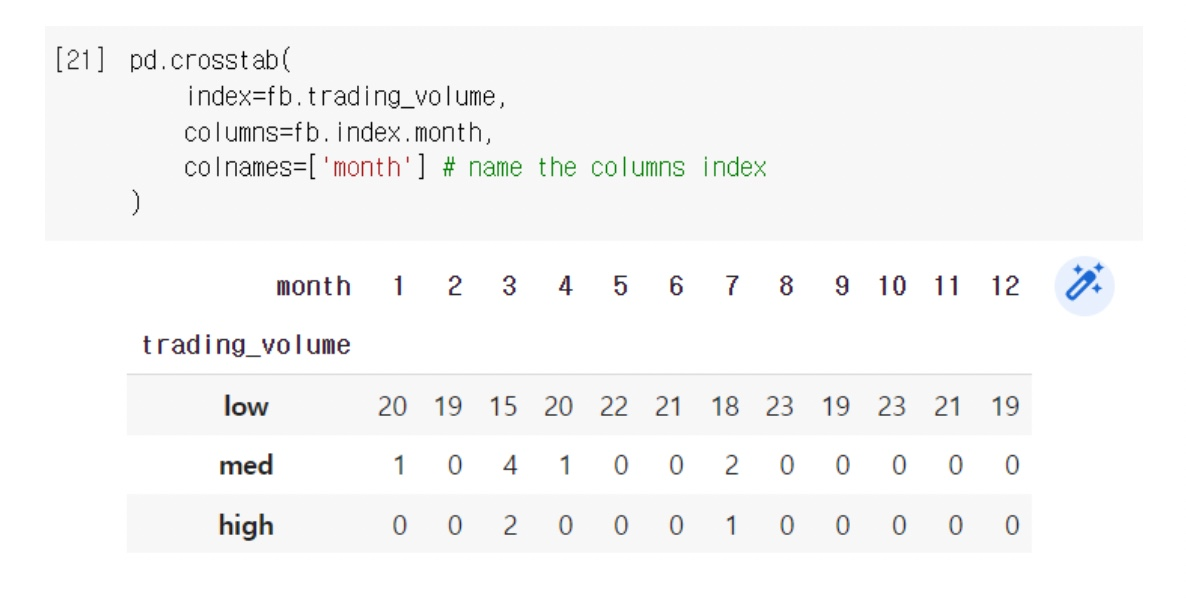

In [27]:
weather

,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.0,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"
...,...,...,...,...
2018-12-31,WDF5,GHCND:USW00094789,130.0,"JFK INTERNATIONAL AIRPORT, NY US"
2018-12-31,WSF2,GHCND:USW00094789,9.8,"JFK INTERNATIONAL AIRPORT, NY US"
2018-12-31,WSF5,GHCND:USW00094789,12.5,"JFK INTERNATIONAL AIRPORT, NY US"


In [39]:
pd.crosstab(
    index=weather.datatype,
    columns=weather.index.month,
    colnames=['month'],
    normalize='columns'
)

month,1,2,3,4,5,6,7,8,9,10,11,12
datatype,,,,,,,,,,,,
AWND,0.033819,0.035432,0.034146,0.035258,0.036993,0.037873,0.037961,0.037822,0.037054,0.034567,0.031546,0.031605
DAPR,0.004812,0.005536,0.003717,0.005876,0.007458,0.005050,0.004592,0.008083,0.006280,0.009898,0.005408,0.003787
MDPR,0.004812,0.005536,0.003580,0.005729,0.007458,0.005050,0.004592,0.008083,0.006280,0.009898,0.005408,0.003787
PGTM,0.016772,0.017716,0.017073,0.017629,0.018496,0.018936,0.018981,0.018911,0.018841,0.018730,0.018026,0.018060
PRCP,0.310558,0.329801,0.311029,0.340385,0.368586,0.375572,0.373642,0.362818,0.376354,0.369880,0.353012,0.344014
SNOW,0.188754,0.156121,0.192620,0.170119,0.157070,0.159224,0.171131,0.152966,0.144293,0.158977,0.169295,0.175502
SNWD,0.100495,0.086998,0.100785,0.084031,0.065185,0.058545,0.058013,0.061309,0.064688,0.068068,0.081869,0.079959
TAVG,0.012785,0.013287,0.012805,0.013222,0.013872,0.014202,0.014235,0.014183,0.014131,0.014162,0.013520,0.013545
TMAX,0.056090,0.059000,0.053972,0.057294,0.059368,0.062175,0.058472,0.063596,0.065787,0.064108,0.061139,0.060006
